In [2]:
# CLASSIFICAÇÃO DE FRUTAS COM KNN E RANDOM FOREST

# 1. Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# List comprehension

List Comprehension é uma forma concisa e elegante de criar listas em Python, usando uma sintaxe compacta baseada em loops. List Comprehension é uma expressão em Python que permite construir listas de maneira eficiente, utilizando uma estrutura parecida com um for, embutida dentro de colchetes ([]), podendo incluir também condições (if).

---
### Estrutura base
```python
[expressão for item in coleção if condição]

```

- *__expressão:__* o valor que será adicionado à lista.

- *__for item in coleção:__* o laço que percorre os elementos.

- *__if condição (opcional):__* uma condição para incluir ou não o item.

---

### A list comprehension:

- Cria uma lista com quantidade elementos.

- Cada elemento é um dicionário com os dados de uma fruta.

- Os valores do dicionário são gerados dinamicamente com np.random.uniform(...).

In [20]:
# exibindo de 1 a 9 somente os pares
[x for x in range(10) if x % 2 == 0]
# Saída: [0, 2, 4, 6, 8]


[0, 2, 4, 6, 8]

In [3]:
# 2. Geração de dataset fictício com list comprehension

''' np.random.seed(42)
Define a semente aleatória para garantir que os mesmos números sejam gerados toda vez.
Isso é útil para reprodutibilidade: todos os alunos terão os mesmos dados.
'''
np.random.seed(42)

def gerar_frutas(nome, peso_range, textura_range, cor_range, docura_range, quantidade):
    return [
        {
            "peso": np.random.uniform(*peso_range),
            "textura": np.random.uniform(*textura_range),
            "cor": np.random.uniform(*cor_range),
            "docura": np.random.uniform(*docura_range),
            "fruta": nome
        }
        for _ in range(quantidade)
    ]


- np.random.uniform(*peso_range) → escolhe um valor aleatório entre os limites de peso (ex: entre 100 e 130).

- O * faz desempacotamento do intervalo (ex: (100, 130) vira 100, 130).

- Isso é repetido para textura, cor e doçura.

In [4]:
# Gerando dados para 3 tipos de frutas
banana = gerar_frutas("Banana", peso_range=(100, 130), textura_range=(0.6, 0.9), cor_range=(0.7, 1.0), docura_range=(5.5, 7.0), quantidade=20)
maca   = gerar_frutas("Maçã", peso_range=(110, 140), textura_range=(0.4, 0.7), cor_range=(0.3, 0.6), docura_range=(5.0, 6.5), quantidade=20)
melancia = gerar_frutas("Melancia", peso_range=(2200, 2800), textura_range=(0.1, 0.4), cor_range=(0.8, 1.0), docura_range=(5.5, 6.8), quantidade=20)
hibrida = gerar_frutas("Híbrida", peso_range=(1000, 1500), textura_range=(0.3, 0.6), cor_range=(0.4, 0.7), docura_range=(5.2, 6.8), quantidade=20)


In [5]:
# Unindo os dados
dados = banana + maca + melancia + hibrida
df = pd.DataFrame(dados)

In [6]:
# 3. Análise Exploratória
print("Primeiras linhas:")
display(df.head())

Primeiras linhas:


,peso,textura,cor,docura,fruta
0,111.236204,0.885214,0.919598,6.397988,Banana
1,104.680559,0.646798,0.717425,6.799264,Banana
2,118.033450,0.812422,0.706175,6.954865,Banana
3,124.973279,0.663702,0.754547,5.775107,Banana
4,109.127267,0.757427,0.829584,5.936844,Banana


In [7]:
# agrupamento por frutas
print("\nDistribuição das classes:")
print(df["fruta"].value_counts())


Distribuição das classes:
fruta
Banana      20
Maçã        20
Melancia    20
Híbrida     20
Name: count, dtype: int64


# Visualizanção da dispersão
- Cada gráfico abaixo da diagonal mostra a relação entre duas variáveis.
- A cor dos pontos indica a fruta correspondente (hue="fruta").

- Onde houver mistura de cores, os modelos terão mais dificuldade.

- Onde houver separação clara, os modelos acertam com facilidade.



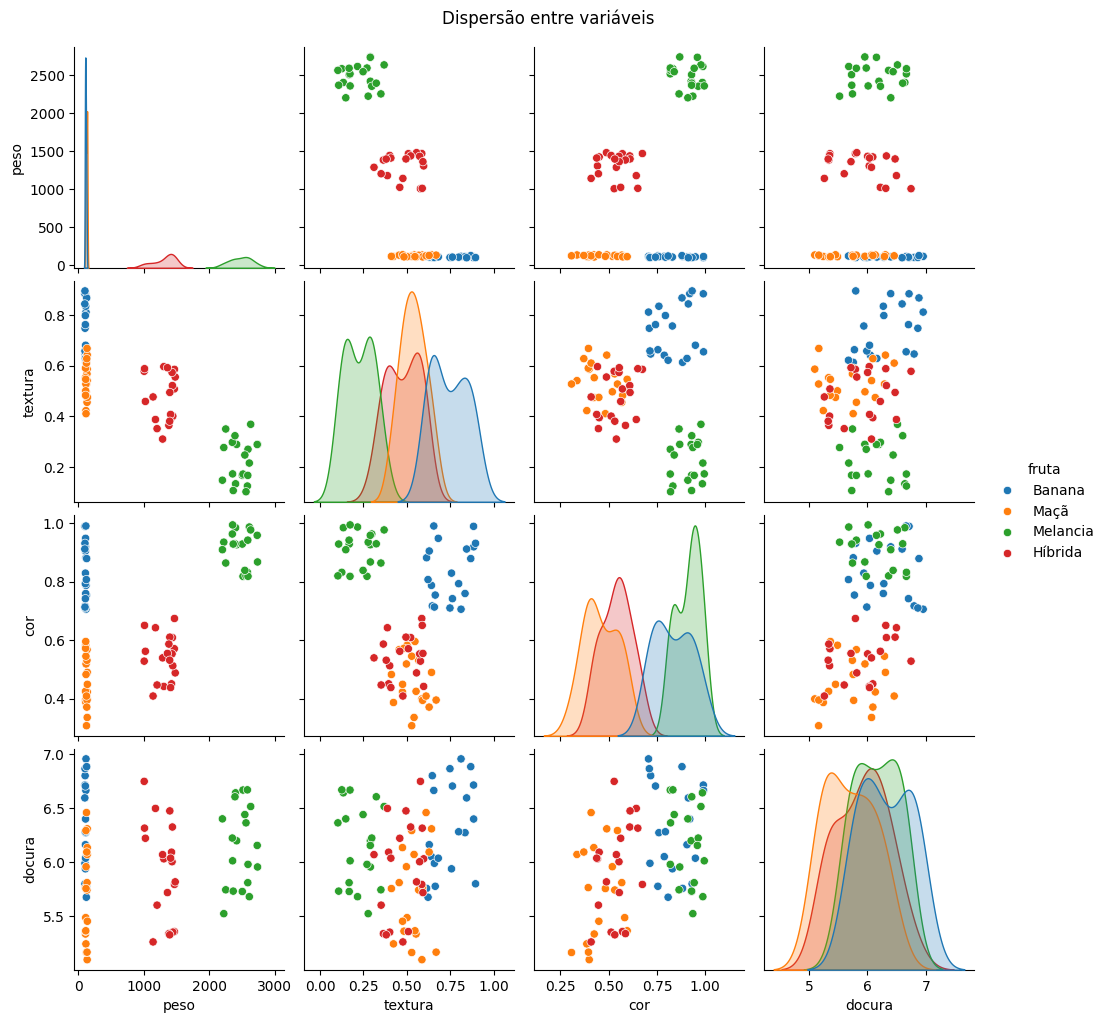

In [8]:
# 4. Visualização
sns.pairplot(df, hue="fruta")
plt.suptitle("Dispersão entre variáveis", y=1.02)
plt.show()

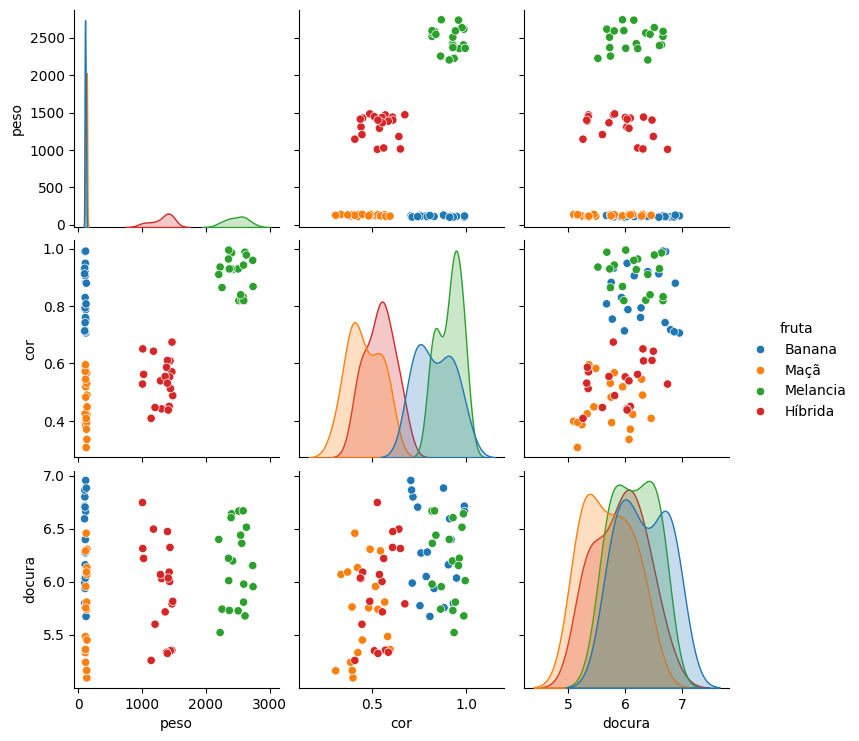

In [9]:
# Qual variável faz mais falta? Qual ajuda mais a separar as frutas?
sns.pairplot(df.drop(columns=["textura"]), hue="fruta")


# Mapa de dispersão da correlação

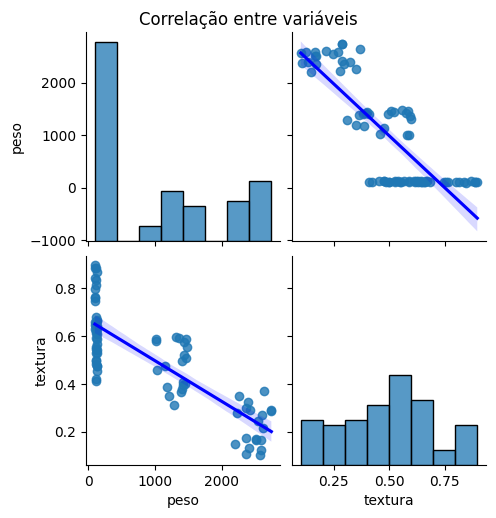

In [30]:
dados_numericos = df.drop(columns=['fruta']) # remove colunas que nao sao numericas

variaveis = ['peso','textura']
dados_selecionados = df[variaveis]
sns.pairplot(dados_selecionados, kind="reg", plot_kws={'line_kws':{'color': 'blue'}})
plt.suptitle("Correlação entre variáveis", y=1.02)
plt.show()

In [31]:
# 5. Preparação dos dados
X = df.drop("fruta", axis=1) # deleta a variavel alvo (feature)
y = df["fruta"] # define a variavel alvo (target)

# Normalização
A normalização é um pré-processamento dos dados numéricos para deixá-los em uma mesma escala. Isso é importante porque muitos algoritmos de IA (como KNN, SVM e redes neurais) são sensíveis à escala das variáveis.

> Exemplo: Se uma variável vai de 0 a 1000 e outra de 0 a 1, a de maior valor pode dominar o modelo — mesmo que não seja a mais importante.

- O menor valor de cada coluna vira 0
- O maior vira 1
- Os demais ficam proporcionalmente entre 0 e 1

# Quando usar normalização

Sempre que seu modelo depende de distâncias ou pesos numéricos, como:

- KNN
- SVM
- Redes neurais
- Regressão logística  

Para melhorar a convergência do modelo e a comparabilidade entre variáveis.



In [11]:
# Normalização
scaler = MinMaxScaler() # cria o objeto do tipo minmaxscaler
X_normalizado = scaler.fit_transform(X) # transforma todos os valores numericos de X para uma escala entre 0 e 1

# O resultado é um array com os dados de X normalizados entre 0 e 1.

In [75]:
# remove as variaveis fruta e peso do treinamento
# aqui pode ser feito o ajuste das variaveis para melhorar a acuracia
X_reduzido = df.drop(columns=["fruta", 'cor'])

# normaliza e separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(X_reduzido), y, test_size=0.2, random_state=42)



# Conceito do KNN — K-Nearest Neighbors (K Vizinhos Mais Próximos)
O KNN é um algoritmo de classificação supervisionada que funciona assim:

> Dado um novo ponto (exemplo), ele procura os K exemplos mais próximos no conjunto de treino, e atribui a classe mais comum entre esses vizinhos.

### Características:
- Baseado em distância (normalmente distância Euclidiana)

- Não há treinamento pesado: o modelo armazena os dados e compara distâncias no momento da previsão

- Simples, porém muito eficaz em muitos cenários



In [76]:
# 6. Treinamento dos modelos
## KNN
knn = KNeighborsClassifier(n_neighbors=5) # cria o modelo que ira olhar para os 5 vizinhos mais proximos
knn.fit(X_train, y_train) # treina o modelo, usa os dados de treino para compara-los, o conhecimento esta em medir distancias
pred_knn = knn.predict(X_test) # usa o modelo treinado para prever a classe dos dados de teste


# Conceito — O que é o Random Forest?
Random Forest é um algoritmo de aprendizado de máquina baseado em árvores de decisão, que funciona da seguinte forma:

> Ele constrói várias árvores de decisão (um conjunto, ou "floresta") e combina suas previsões para obter um resultado mais estável e preciso.

### Como funciona?
- Cria várias árvores de decisão diferentes.

- Cada árvore é treinada com um subconjunto aleatório dos dados (com reposição → bootstrap).

- Para cada predição, cada árvore "vota" e o modelo escolhe a classe mais votada (maioria).

Esse processo reduz o risco de overfitting e melhora a precisão geral.

In [77]:
## Random Forest
rf = RandomForestClassifier(random_state=42) # cria a instancia do modelo, o parametro 42, as mesmas arvores serao criadas toda vez
rf.fit(X_train, y_train) # treina o modelo com os dados de treino
pred_rf = rf.predict(X_test) # faz a predição

#🔎 Exemplo Lúdico:
Imagine que você está em uma floresta com 100 árvores 🌳.

Você pergunta:

> "Qual fruta é essa, com textura média, cor amarela e docura alta?"

Cada árvore, com base no que aprendeu, responde:

- 60 árvores dizem "banana" 🍌

- 30 dizem "maçã" 🍎

- 10 dizem "pêra" 🍐

A floresta vota: "Essa fruta é uma banana!"

In [79]:
from sklearn.svm import SVC

# SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)


In [80]:
# 7. Avaliação dos modelos
def avaliar_modelo(nome, y_true, y_pred):
    print(f"\n Modelo: {nome}")
    print("Acurácia:", accuracy_score(y_true, y_pred)) # mostra a acuracia, porcentagem de acertos (acuracia = numero_acertos/total_previsões)
    print("Relatório de Classificação:\n", classification_report(y_true, y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_true, y_pred)) # matriz de confusão, Linha = classe real, Coluna = classe prevista

avaliar_modelo("KNN", y_test, pred_knn)
avaliar_modelo("Random Forest", y_test, pred_rf)
avaliar_modelo("SVM", y_test, pred_svm)



 Modelo: KNN
Acurácia: 0.9375
Relatório de Classificação:
               precision    recall  f1-score   support

      Banana       0.83      1.00      0.91         5
     Híbrida       1.00      1.00      1.00         3
        Maçã       1.00      0.83      0.91         6
    Melancia       1.00      1.00      1.00         2

    accuracy                           0.94        16
   macro avg       0.96      0.96      0.95        16
weighted avg       0.95      0.94      0.94        16

Matriz de Confusão:
[[5 0 0 0]
 [0 3 0 0]
 [1 0 5 0]
 [0 0 0 2]]

 Modelo: Random Forest
Acurácia: 0.875
Relatório de Classificação:
               precision    recall  f1-score   support

      Banana       0.71      1.00      0.83         5
     Híbrida       1.00      1.00      1.00         3
        Maçã       1.00      0.67      0.80         6
    Melancia       1.00      1.00      1.00         2

    accuracy                           0.88        16
   macro avg       0.93      0.92      0.91  

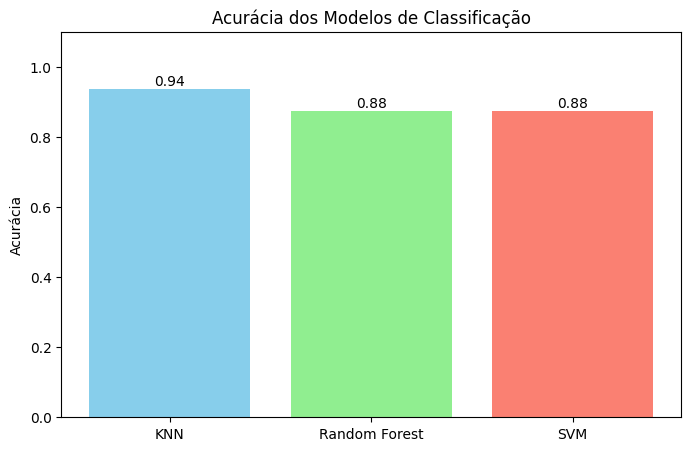

In [81]:
nomes_modelos = ["KNN", "Random Forest", "SVM"]
acuracias = [
    accuracy_score(y_test, pred_knn),
    accuracy_score(y_test, pred_rf),
    accuracy_score(y_test, pred_svm)
]

plt.figure(figsize=(8, 5))
plt.bar(nomes_modelos, acuracias, color=['skyblue', 'lightgreen', 'salmon'])
for i, acc in enumerate(acuracias):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.ylim(0, 1.1)
plt.title("Acurácia dos Modelos de Classificação")
plt.ylabel("Acurácia")
plt.show()


# 🧪 Quando usar cada um?
| Situação                                 | Melhor opção             |
| ---------------------------------------- | ------------------------ |
| Dados pequenos com boa separação         | **SVM**                  |
| Rápida implementação com dados simples   | **KNN**                  |
| Dados grandes e complexos                | **Random Forest**        |
| Deseja interpretabilidade e desempenho   | **Random Forest**        |
| Problema com muitas variáveis (features) | **SVM** ou Random Forest |


# Salvando os modelos

In [84]:
import pickle

modelos_salvar = {
    "KNN": knn,
    "Random Forest": rf,
    "SVM": svm
}

with open("modelos.pkl", "wb") as f:
    pickle.dump(modelos_salvar, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
